# STROKE PREDICTION USING MACHINE LEARNING

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
df= pd.read_csv(r"C:\Users\HPUSER\Documents\Masters project\Stroke prediction\stroke\healthcare-dataset-stroke-data.csv")

## EXPLORATORY DATA ANALYSIS 

In [3]:
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [4]:
df.shape

(5110, 12)

In [5]:
df.isna().sum()

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

In [6]:
df.duplicated().sum()

0

In [7]:
df.columns

Index(['id', 'gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status', 'stroke'],
      dtype='object')

In [8]:
df.dtypes

id                     int64
gender                object
age                  float64
hypertension           int64
heart_disease          int64
ever_married          object
work_type             object
Residence_type        object
avg_glucose_level    float64
bmi                  float64
smoking_status        object
stroke                 int64
dtype: object

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [10]:
df.describe()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000
mean,36517.829354,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,21161.721625,22.612647,0.296607,0.226063,45.283560,7.854067,0.215320
min,67.000000,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,17741.250000,25.000000,0.000000,0.000000,77.245000,23.500000,0.000000
50%,36932.000000,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,54682.000000,61.000000,0.000000,0.000000,114.090000,33.100000,0.000000
max,72940.000000,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


In [11]:
df.nunique()

id                   5110
gender                  3
age                   104
hypertension            2
heart_disease           2
ever_married            2
work_type               5
Residence_type          2
avg_glucose_level    3979
bmi                   418
smoking_status          4
stroke                  2
dtype: int64

In [12]:
df["Residence_type"].unique()

array(['Urban', 'Rural'], dtype=object)

In [13]:
df["ever_married"].unique()

array(['Yes', 'No'], dtype=object)

In [14]:
df["work_type"].unique()

array(['Private', 'Self-employed', 'Govt_job', 'children', 'Never_worked'],
      dtype=object)

In [15]:
df["work_type"].value_counts()

Private          2925
Self-employed     819
children          687
Govt_job          657
Never_worked       22
Name: work_type, dtype: int64

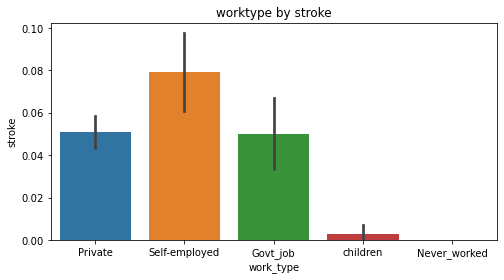

In [16]:
plt.figure(figsize= (8,4))
sns.barplot(x = df["work_type"], y = df["stroke"])
plt.title("worktype by stroke")
plt.show()

In [17]:
df["smoking_status"].unique()

array(['formerly smoked', 'never smoked', 'smokes', 'Unknown'],
      dtype=object)

In [18]:
df.gender.value_counts()

Female    2994
Male      2115
Other        1
Name: gender, dtype: int64

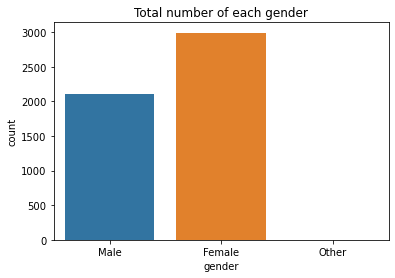

In [19]:
plt.figure(figsize= (6,4))
sns.countplot("gender" , data=df)
plt.title("Total number of each gender")
plt.show()

In [20]:
df.smoking_status.value_counts()

never smoked       1892
Unknown            1544
formerly smoked     885
smokes              789
Name: smoking_status, dtype: int64

In [21]:
df.Residence_type.value_counts()

Urban    2596
Rural    2514
Name: Residence_type, dtype: int64

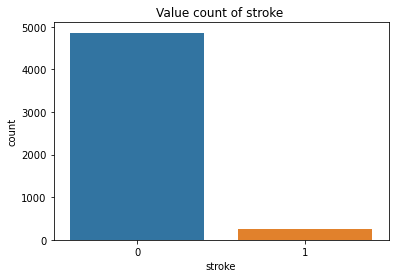

In [22]:
#Lets see the distribution of number of Strokes in the dataset
# this is a sigh of unbalance dataset
sns.countplot(data=df,x="stroke")
plt.title ("Value count of stroke ")
plt.show()


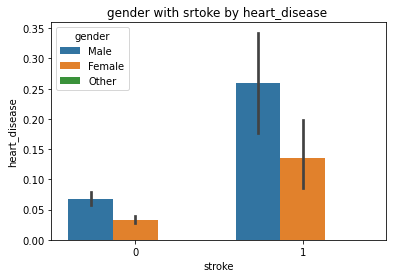

In [23]:
plt.figure(figsize=(6,4))
sns.barplot(x = df["stroke"], y = df["heart_disease"], hue = df["gender"])
plt.xlabel("stroke")
plt.ylabel("heart_disease")
plt.title ("gender with srtoke by heart_disease ")
plt.show()

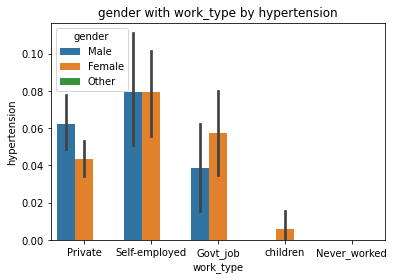

In [24]:
plt.figure(figsize=(6,4))
sns.barplot(x = df["work_type"], y = df["stroke"], hue = df["gender"])
plt.xlabel("work_type")
plt.ylabel("hypertension")
plt.title ("gender with work_type by hypertension")
plt.show()

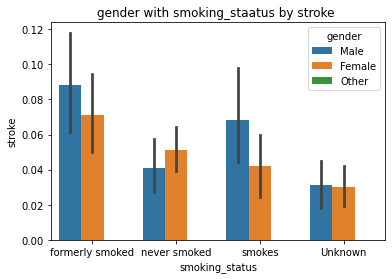

In [25]:
plt.figure(figsize=(6,4))
sns.barplot(x = df["smoking_status"], y = df["stroke"], hue = df["gender"])
plt.xlabel("smoking_status")
plt.ylabel("stroke")
plt.title ("gender with smoking_staatus by stroke ")
plt.show()

## DATA PEPROCESSING

In [26]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix
from sklearn import metrics
from sklearn.metrics import roc_curve,roc_auc_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
import xgboost as xgb
from sklearn.metrics import r2_score
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from matplotlib import pyplot
from sklearn.ensemble import StackingClassifier
from sklearn.metrics import accuracy_score


In [27]:
df.shape

(5110, 12)

In [28]:
#changing age which was in float to int
df=df.astype({"age":"int"})

In [29]:
#We should fill it with bmi column's mean value.
df["bmi"].fillna(df["bmi"].mean(), inplace=True)

In [30]:
df.isnull().sum()

id                   0
gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

In [31]:
#drop the id column because it is irrelevant
df.drop(["id"], axis=1, inplace=True)

In [32]:
df['work_type'] = df['work_type'].map({'Private':0, 'Self-employed': 1, 'Govt_job':2, 'children':3, 'Never_worked':4})

In [33]:
df['gender'] = df['gender'].map({'Male':0, 'Female':1})
df['Residence_type'] = df['Residence_type'].map({'Urban':0, 'Rural':1})
df['smoking_status'] = df['smoking_status'].map({'formerly smoked':0, 'never smoked':1, 'smokes':2, 'Unknown':3})
df['ever_married'] = df['ever_married'].map({'Yes':0, 'No':1})

In [34]:
df.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,0.0,67,0,1,0,0,0,228.69,36.600000,0,1
1,1.0,61,0,0,0,1,1,202.21,28.893237,1,1
2,0.0,80,0,1,0,0,1,105.92,32.500000,1,1
3,1.0,49,0,0,0,0,0,171.23,34.400000,2,1
4,1.0,79,1,0,0,1,1,174.12,24.000000,1,1


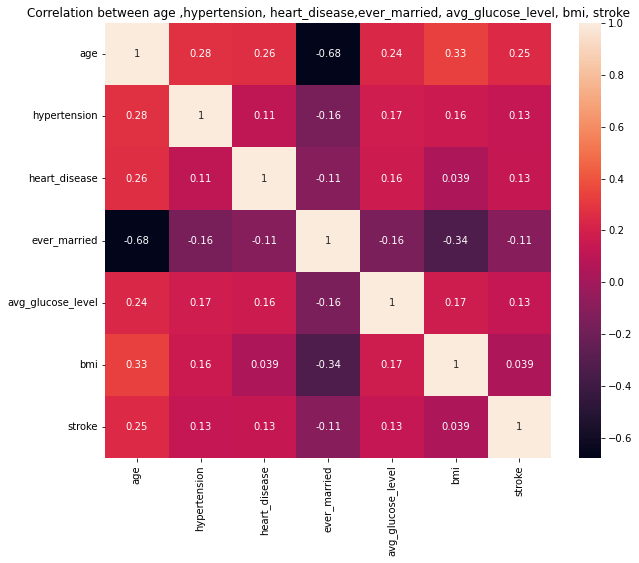

In [35]:
plt.figure(figsize=(10, 8))
sns.heatmap(df.loc[:, ["age" ,"hypertension", "heart_disease", "ever_married", 
                       "avg_glucose_level", "bmi", "stroke"]].corr(), annot=True,)
plt.title('Correlation between age ,hypertension, heart_disease,ever_married, avg_glucose_level, bmi, stroke')
plt.show()

In [36]:
df.gender=(df.gender.fillna(1))
df.isna().sum()

gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

In [37]:
import imblearn
from collections import Counter
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer

In [38]:
x = df.drop("stroke" , axis = 1).values
y= df["stroke"]

In [39]:
df.isna().sum()

gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

In [40]:
smote = SMOTE()

x_smote, y_smote = smote.fit_resample(x, y)

print(y_smote.value_counts())

1    4861
0    4861
Name: stroke, dtype: int64


Text(0, 0.5, 'Count')

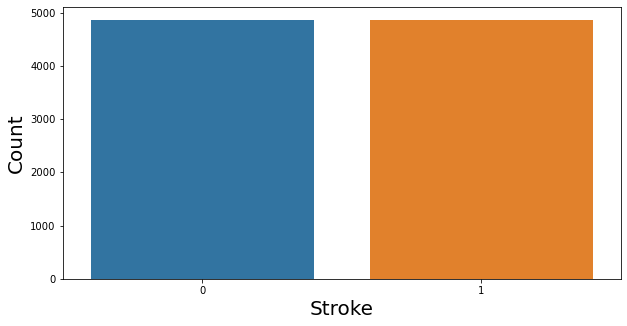

In [41]:
stroke_label = y_smote.value_counts()
plt.figure(figsize=(10, 5))
sns.barplot(stroke_label.index, stroke_label);
plt.xlabel('Stroke', fontsize=20);
plt.ylabel('Count', fontsize=20)

In [42]:
from sklearn.model_selection import train_test_split
x_train,x_test, y_train,y_test=train_test_split(x_smote,y_smote,test_size=0.3,random_state = 1)

In [43]:
#standard scalling
sc_x = StandardScaler()
x_train = sc_x.fit_transform(x_train)
x_test = sc_x.transform(x_test)

In [44]:
print(x_train.shape, x_test.shape,y_train.shape,y_test.shape)

(6805, 10) (2917, 10) (6805,) (2917,)


## MODEL BUILDING

### Random Forest

In [45]:
rf= RandomForestClassifier(criterion= "entropy",n_estimators = 10,)

In [46]:
rf.fit(x_train, y_train)

RandomForestClassifier(criterion='entropy', n_estimators=10)

In [47]:
rf_preds=rf.predict(x_test)

In [48]:
#Accuracy of the trained model 
rf.score(x_train,y_train)

0.9964731814842028

In [49]:
rf_cm = confusion_matrix (y_test, rf_preds)
rf_cm

array([[1430,   23],
       [  74, 1390]], dtype=int64)

Text(0.5, 1.0, 'confussion metrix for random forest')

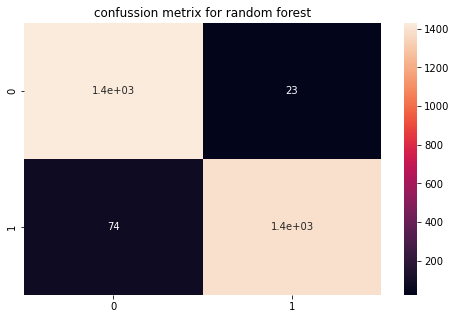

In [50]:
plt.figure(figsize = (8,5))
sns.heatmap(rf_cm,annot=True,)
plt.title("confussion metrix for random forest")

In [51]:
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report 
print(classification_report(y_test,rf_preds))

              precision    recall  f1-score   support

           0       0.95      0.98      0.97      1453
           1       0.98      0.95      0.97      1464

    accuracy                           0.97      2917
   macro avg       0.97      0.97      0.97      2917
weighted avg       0.97      0.97      0.97      2917



In [52]:
#Accuracy of the test Model
accuracy_score(y_test,rf_preds)

0.9667466575248543

In [53]:
from sklearn.metrics import precision_score, recall_score,accuracy_score, f1_score
print("Accuracy:", accuracy_score(y_test,rf_preds))
print("precision:", precision_score(y_test,rf_preds, average = "macro"))
print("recall:", recall_score(y_test,rf_preds,average ="macro"))
print("F1 Score:", f1_score(y_test,rf_preds, average = "macro"))

Accuracy: 0.9667466575248543
precision: 0.9672602242098447
recall: 0.9668121166307508
F1 Score: 0.9667404034352189


### Logistic Regresion 


In [54]:
lr=LogisticRegression(random_state=0)
lr.fit(x_train,y_train)

LogisticRegression(random_state=0)

In [55]:
lr_pred=lr.predict(x_test)

In [56]:
#Accuracy of the trained model 
lr.score(x_train,y_train)

0.7676708302718589

In [57]:
#Accuracy of the test Model
accuracy_score(y_test,lr_pred)

0.7754542338018512

In [58]:
lr_cm = confusion_matrix (y_test, lr_pred)
lr_cm

array([[1076,  377],
       [ 278, 1186]], dtype=int64)

In [59]:
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report 
print(classification_report(y_test,lr_pred))

              precision    recall  f1-score   support

           0       0.79      0.74      0.77      1453
           1       0.76      0.81      0.78      1464

    accuracy                           0.78      2917
   macro avg       0.78      0.78      0.78      2917
weighted avg       0.78      0.78      0.78      2917



In [60]:
print("Accuracy:", accuracy_score(y_test,lr_pred))
print("precision:", precision_score(y_test,lr_pred, average = "macro"))
print("recall:", recall_score(y_test,lr_pred,average ="macro"))
print("F1 Score:", f1_score(y_test,lr_pred, average = "macro"))

Accuracy: 0.7754542338018512
precision: 0.7767398036764128
recall: 0.7753230549945656
F1 Score: 0.7751344655022031


Text(0.5, 1.0, 'Logistic regressin Confussion matrics')

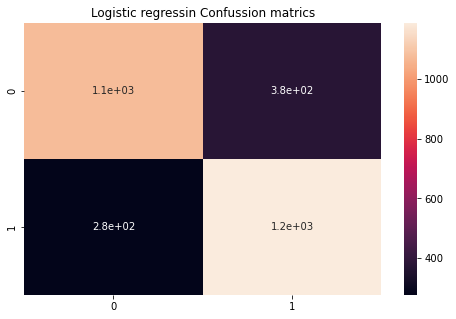

In [61]:
plt.figure(figsize = (8,5))
sns.heatmap(lr_cm,annot=True,)
plt.title("Logistic regressin Confussion matrics")

### Gradient Boosting

In [62]:
xgb = XGBClassifier()

In [63]:
xgb.fit(x_train, y_train)
xgb_pred = xgb.predict(x_test)

In [64]:
score = accuracy_score(y_test, xgb_pred)
print(score)

0.9698320191978059


In [65]:
xgb_cm = confusion_matrix(y_test, xgb_pred)
xgb_cm

array([[1433,   20],
       [  68, 1396]], dtype=int64)

In [66]:
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report 
print(classification_report(y_test,xgb_pred))

              precision    recall  f1-score   support

           0       0.95      0.99      0.97      1453
           1       0.99      0.95      0.97      1464

    accuracy                           0.97      2917
   macro avg       0.97      0.97      0.97      2917
weighted avg       0.97      0.97      0.97      2917



Text(0.5, 1.0, 'XGBoost regressin Confussion matrics')

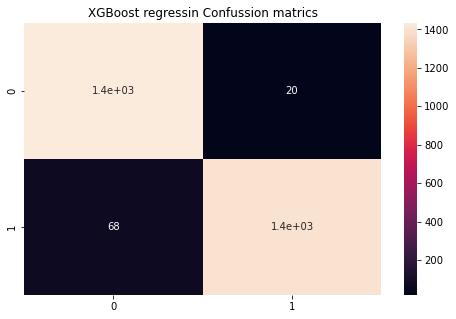

In [67]:
plt.figure(figsize = (8,5))
sns.heatmap(xgb_cm,annot=True,)
plt.title("XGBoost regressin Confussion matrics")

In [68]:
print("Accuracy:", accuracy_score(y_test,xgb_pred))
print("precision:", precision_score(y_test,xgb_pred, average = "macro"))
print("recall:", recall_score(y_test,xgb_pred,average ="macro"))
print("F1 Score:", f1_score(y_test,xgb_pred, average = "macro"))

Accuracy: 0.9698320191978059
precision: 0.9702862874844266
recall: 0.9698936438271675
F1 Score: 0.9698271646731362


### Neural Network

In [69]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import Model
from keras.models import Sequential
from sklearn.neural_network import MLPClassifier

In [70]:
nn_clf = MLPClassifier

In [71]:
x_train=np.array(x_train,dtype=np.float)
y_train=np.array(y_train,dtype=np.float)
x_test=np.array(x_test,dtype=np.float)
y_test=np.array(y_test,dtype=np.float)

#converting the x and y to float

In [72]:
nn_clf =tf.keras.models.Sequential()
nn_clf.add(tf.keras.layers.Dense(units=25,activation='relu'))
nn_clf.add(tf.keras.layers.Dense(units=16,activation='relu'))
nn_clf.add(tf.keras.layers.Dense(units=8,activation='relu'))
nn_clf.add(tf.keras.layers.Dense(units=1,activation='sigmoid'))

nn_clf.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# model.summary()

train=nn_clf.fit(x_train, y_train ,batch_size=128 , epochs=100)

Epoch 1/100
54/54 [==============================] - 1s 3ms/step - loss: 0.6387 - accuracy: 0.6403
Epoch 2/100
54/54 [==============================] - 0s 3ms/step - loss: 0.5456 - accuracy: 0.7446
Epoch 3/100
54/54 [==============================] - 0s 3ms/step - loss: 0.4916 - accuracy: 0.7768
Epoch 4/100
54/54 [==============================] - 0s 3ms/step - loss: 0.4645 - accuracy: 0.7860
Epoch 5/100
54/54 [==============================] - 0s 3ms/step - loss: 0.4467 - accuracy: 0.7962
Epoch 6/100
54/54 [==============================] - 0s 3ms/step - loss: 0.4331 - accuracy: 0.8024
Epoch 7/100
54/54 [==============================] - 0s 3ms/step - loss: 0.4202 - accuracy: 0.8094
Epoch 8/100
54/54 [==============================] - 0s 3ms/step - loss: 0.4086 - accuracy: 0.8131
Epoch 9/100
54/54 [==============================] - 0s 3ms/step - loss: 0.3970 - accuracy: 0.8181
Epoch 10/100
54/54 [==============================] - 0s 3ms/step - loss: 0.3869 - accuracy: 0.8225
Epoch 11/

In [73]:
NN_cm = confusion_matrix (y_test, lr_pred)
NN_cm

array([[1076,  377],
       [ 278, 1186]], dtype=int64)

Text(0.5, 1.0, ' neural network Confussion matrics')

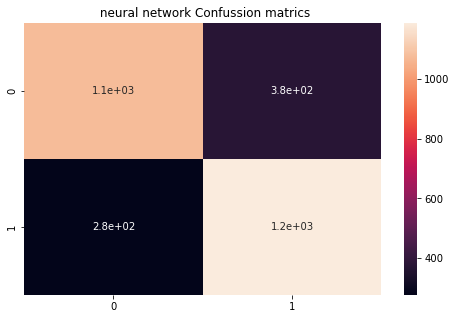

In [74]:
#confusion metrics
plt.figure(figsize = (8,5))
sns.heatmap(NN_cm,annot=True,)
plt.title(" neural network Confussion matrics")

In [75]:
score = nn_clf.evaluate(x,y)
print("accuracy:", score [1])

160/160 [==============================] - 1s 2ms/step - loss: 26.6266 - accuracy: 0.9513
accuracy: 0.9512720108032227


In [76]:
print("Accuracy:", accuracy_score(y_test,xgb_pred))
print("precision:", precision_score(y_test,xgb_pred, average = "macro"))
print("recall:", recall_score(y_test,xgb_pred,average ="macro"))
print("F1 Score:", f1_score(y_test,xgb_pred, average = "macro"))

Accuracy: 0.9698320191978059
precision: 0.9702862874844266
recall: 0.9698936438271675
F1 Score: 0.9698271646731362


Text(0.5, 1.0, 'ROC curve analysis')

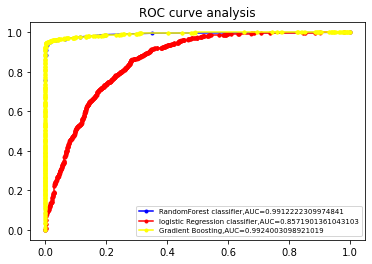

In [77]:
plt.figure(0).clf()
predicted_probab = rf.predict_proba(x_test)
predicted_probab = predicted_probab[:, 1]
fpr, tpr, _ = roc_curve(y_test, predicted_probab)
auc = metrics.roc_auc_score(y_test, predicted_probab)
pyplot.plot(fpr, tpr, marker=".", color="blue",label="RandomForest classifier,AUC="+str(auc))
plt.legend(prop={"size":7},loc=4)

y_pred_proba= lr.predict_proba(x_test)[:,1]
lr_fpr, lr_tpr, _ = metrics.roc_curve(y_test, y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(lr_fpr, lr_tpr,marker=".", color='red',label="logistic Regression classifier,AUC="+str(auc))
plt.legend(prop={"size":7},loc=4)

xgb_pred= xgb.predict_proba(x_test)[:,1]
xgb_fpr, xgb_tpr, _ = metrics.roc_curve(y_test,xgb_pred)
auc = metrics.roc_auc_score(y_test, xgb_pred)
plt.plot(xgb_fpr, xgb_tpr,marker=".", color='yellow',label="Gradient Boosting,AUC="+str(auc))
plt.legend(prop={"size":7},loc=4)
plt.title("ROC curve analysis")

### Stacking

In [78]:
estimators={
    ("rf", RandomForestClassifier(n_estimators = 100, random_state = 42)),
    ("lr", LogisticRegression(random_state = 42)),
    ("xgb", XGBClassifier()),
    ("nn_clf", MLPClassifier())
}

In [79]:
stack_model = StackingClassifier(estimators =estimators,final_estimator =RandomForestClassifier())

In [80]:
stack_model.fit(x_train,y_train)

StackingClassifier(estimators={('lr', LogisticRegression(random_state=42)),
                               ('nn_clf', MLPClassifier()),
                               ('rf', RandomForestClassifier(random_state=42)),
                               ('xgb',
                                XGBClassifier(base_score=None, booster=None,
                                              callbacks=None,
                                              colsample_bylevel=None,
                                              colsample_bynode=None,
                                              colsample_bytree=None,
                                              early_stopping_rounds=None,
                                              enable_categorical=False,
                                              eval_metric=None,
                                              f...
                                              interaction_constraints=None,
                                              learning_rate=None, max_bin=None,
                                              max_cat_threshold=None,
                                              max_cat_to_onehot=None,
                                              max_delta_step=None,
                                              max_depth=None, max_leaves=None,
                                              min_child_weight=None,
                                              missing=nan,
                                              monotone_constraints=None,
                                              n_estimators=100, n_jobs=None,
                                              num_parallel_tree=None,
                                              predictor=None, random_state=None, ...))},
                   final_estimator=RandomForestClassifier())

In [81]:
y_train_pred= stack_model.predict(x_train)
y_test_pred= stack_model.predict(x_test)

In [82]:
#Trainning accuracy
ac=accuracy_score(y_train,y_train_pred)
ac

1.0

In [83]:
cm = confusion_matrix(y_test, y_test_pred)
ac=accuracy_score(y_test,y_test_pred)

In [84]:
cm

array([[1431,   22],
       [  58, 1406]], dtype=int64)

In [85]:
#Testing accuracy
ac

0.9725745629070963

In [86]:
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report 
print(classification_report(y_test,y_test_pred))

              precision    recall  f1-score   support

         0.0       0.96      0.98      0.97      1453
         1.0       0.98      0.96      0.97      1464

    accuracy                           0.97      2917
   macro avg       0.97      0.97      0.97      2917
weighted avg       0.97      0.97      0.97      2917

